## Classify sports medicine documents with topic modeling solution

We analized a set of documents, characterized by title and abstract, and classified them by using topic modeling solutions.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os #It provides operating system operations.

import numpy as np
import pandas as pd
import seaborn as sns

# Where to save results and images
PATH = "../"

RESULTS_PATH = os.path.join(PATH, "results")
os.makedirs(RESULTS_PATH, exist_ok=True)

IMAGES_PATH = os.path.join(PATH, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_csv(data, file_name, index=False):
    path = os.path.join(RESULTS_PATH, file_name + ".csv")
    print("Saving CSV file:", file_name)
    
    data.to_csv(path, index=index)

- Define research questions:

1) Which are the areas of sports medicine and orthopaedic surgery where AI is most used?
2) Which are the most commonly used data mining techniques in sports medicine?


- Define sports medicine-based corpus

In [2]:
# Create the corpus with the article titles and abstracts
articles_data = [
    ('''Computer vs human: Deep learning versus perceptual training for the detection of neck of femur fractures''', '''Methods
This study extends a previous study that conducted perceptual training in medically-naïve individuals for the detection of NoF fractures on a variety of dataset sizes. The same anteroposterior hip radiograph dataset was used to train two DCNNs (AlexNet and GoogLeNet) to detect NoF fractures. For direct comparison with perceptual training results, deep learning was completed across a variety of dataset sizes (200, 320 and 640 images) with images split into training (80%) and validation (20%). An additional 160 images were used as the final test set. Multiple pre-processing and augmentation techniques were utilised.

Results
AlexNet and GoogLeNet DCNNs NoF fracture detection accuracy increased with larger training dataset sizes and mildly with augmentation. Accuracy increased from 81.9% and 88.1% to 89.4% and 94.4% for AlexNet and GoogLeNet respectively. Similarly, the test accuracy for the perceptual training in top-performing medically-naïve individuals increased from 87.6% to 90.5% when trained on 640 images compared with 200 images.

Conclusions
Single detection tasks in radiology are commonly used in DCNN research with their results often used to make broader claims about machine learning being able to perform as well as subspecialty radiologists. This study suggests that as impressive as recognising fractures is for a DCNN, similar learning can be achieved by top-performing medically-naïve humans with less than 1 hour of perceptual training.'''),
    ('''Tethered to the EHR: Primary Care Physician Workload Assessment Using EHR Event Log Data and Time-Motion Observations''','''PURPOSE Primary care physicians spend nearly 2 hours on electronic health record (EHR) tasks per hour of direct patient care. Demand for non–face-to-face care, such as communication through a patient portal and administrative tasks, is increasing and contributing to burnout. The goal of this study was to assess time allocated by primary care physicians within the EHR as indicated by EHR user-event log data, both during clinic hours (defined as 8:00 am to 6:00 pm Monday through Friday) and outside clinic hours.

METHODS We conducted a retrospective cohort study of 142 family medicine physicians in a single system in southern Wisconsin. All Epic (Epic Systems Corporation) EHR interactions were captured from “event logging” records over a 3-year period for both direct patient care and non–face-to-face activities, and were validated by direct observation. EHR events were assigned to 1 of 15 EHR task categories and allocated to either during or after clinic hours.

RESULTS Clinicians spent 355 minutes (5.9 hours) of an 11.4-hour workday in the EHR per weekday per 1.0 clinical full-time equivalent: 269 minutes (4.5 hours) during clinic hours and 86 minutes (1.4 hours) after clinic hours. Clerical and administrative tasks including documentation, order entry, billing and coding, and system security accounted for nearly one-half of the total EHR time (157 minutes, 44.2%). Inbox management accounted for another 85 minutes (23.7%).

CONCLUSIONS Primary care physicians spend more than one-half of their workday, nearly 6 hours, interacting with the EHR during and after clinic hours. EHR event logs can identify areas of EHR-related work that could be delegated, thus reducing workload, improving professional satisfaction, and decreasing burnout. Direct time-motion observations validated EHR-event log data as a reliable source of information regarding clinician time allocation.'''),
    ('''Artificial Intelligence and Machine Learning Across the Care Continuum in Lower Extremity Arthroplasty''','''The exponential increase in healthcare data combined with advances in computing power have resulted in the potential for new applications for artificial intelligence (AI) and machine learning (ML) across all specialties. In particular, lower extremity arthroplasty is well suited for the implementation of artificial intelligence due to its elective nature, high patient volumes and shifting payment modules.

Cleveland Clinic researchers from the Department of Orthopedics recently published “Artificial Intelligence and Machine Learning in Lower Extremity Arthroplasty: A Review,” in the Journal of Arthroplasty. The review summarizes developments in AI and ML in the context of healthcare, as well as recent advances and applications in arthroplasty.'''),
    ('''Machine Learning Groups Patients by Early Functional Improvement Likelihood Based on Wearable Sensor Instrumented Preoperative Timed-Up-and-Go Tests''','''Background
Wearable sensors permit efficient data collection and unobtrusive systems can be used for instrumenting knee patients for objective assessment. Machine learning can be leveraged to parse the abundant information these systems provide and segment patients into relevant groups without specifying group membership criteria. The objective of this study is to examine functional parameters influencing favorable recovery outcomes by separating patients into functional groups and tracking them through clinical follow-ups.

Methods
Patients undergoing primary unilateral total knee arthroplasty (n = 68) completed instrumented timed-up-and-go tests preoperatively and at their 2-, 6-, and 12-week follow-up appointments. A custom wearable system extracted 55 metrics for analysis and a K-means algorithm separated patients into functionally distinguished groups based on the derived features. These groups were analyzed to determine which metrics differentiated most and how each cluster improved during early recovery.

Results
Patients separated into 2 clusters (n = 46 and n = 22) with significantly different test completion times (12.6 s vs 21.6 s, P < .001). Tracking the recovery of both groups to their 12-week follow-ups revealed 64% of one group improved their function while 63% of the other maintained preoperative function. The higher improvement group shortened their test times by 4.94 s, (P = .005) showing faster recovery while the other group did not improve above a minimally important clinical difference (0.87 s, P = .07). Features with the largest effect size between groups were distinguished as important functional parameters.

Conclusion
This work supports using wearable sensors to instrument functional tests during clinical visits and using machine learning to parse complex patterns to reveal clinically relevant parameters.'''),
    ("Machine Learning in Orthopedics: A Literature Review","In this paper we present the findings of a systematic literature review covering the articles published in the last two decades in which the authors described the application of a machine learning technique and method to an orthopedic problem or purpose. By searching both in the Scopus and Medline databases, we retrieved, screened and analyzed the content of 70 journal articles, and coded these resources following an iterative method within a Grounded Theory approach. We report the survey findings by outlining the articles' content in terms of the main machine learning techniques mentioned therein, the orthopedic application domains, the source data and the quality of their predictive performance."),
    ("AI Now 2017 Report","Building on the inaugural 2016 report, the AI Now 2017 Report addresses the most recent scholarly literature in order to raise critical social questions that will shape our present and near future. This report focuses on new developments in four areas: labor and automation, bias and inclusion, rights and liberties, and ethics and governance. We identify emerging challenges in each of these areas and make recommendations to ensure that the benefits of AI will be shared broadly, and that risks can be identified and mitigated."),
    ("A guide to deep learning in healthcare","Here we present deep-learning techniques for healthcare, centering our discussion on deep learning in computer vision, natural language processing, reinforcement learning, and generalized methods. We describe how these computational techniques can impact a few key areas of medicine and explore how to build end-to-end systems. Our discussion of computer vision focuses largely on medical imaging, and we describe the application of natural language processing to domains such as electronic health record data. Similarly, reinforcement learning is discussed in the context of robotic-assisted surgery, and generalized deep-learning methods for genomics are reviewed."),
    ("Artificial intelligence detection of distal radius fractures: a comparison between the convolutional neural network and professional assessments",'''Background and purpose — Artificial intelligence has rapidly become a powerful method in image analysis with the use of convolutional neural networks (CNNs). We assessed the ability of a CNN, with a fast object detection algorithm previously identifying the regions of interest, to detect distal radius fractures (DRFs) on anterior–posterior (AP) wrist radiographs.

Patients and methods — 2,340 AP wrist radiographs from 2,340 patients were enrolled in this study. We trained the CNN to analyze wrist radiographs in the dataset. Feasibility of the object detection algorithm was evaluated by intersection of the union (IOU). The diagnostic performance of the network was measured by area under the receiver operating characteristics curve (AUC), accuracy, sensitivity, specificity, and Youden Index; the results were compared with those of medical professional groups.

Results — The object detection model achieved a high average IOU, and none of the IOUs had a value less than 0.5. The AUC of the CNN for this test was 0.96. The network had better performance in distinguishing images with DRFs from normal images compared with a group of radiologists in terms of the accuracy, sensitivity, specificity, and Youden Index. The network presented a similar diagnostic performance to that of the orthopedists in terms of these variables.

Interpretation — The network exhibited a diagnostic ability similar to that of the orthopedists and a performance superior to that of the radiologists in distinguishing AP wrist radiographs with DRFs from normal images under limited conditions. Further studies are required to determine the feasibility of applying our method as an auxiliary in clinical practice under extended conditions.'''),
    ("On the ethics of algorithmic decision-making in healthcare","In recent years, a plethora of high-profile scientific publications has been reporting about machine learning algorithms outperforming clinicians in medical diagnosis or treatment recommendations. This has spiked interest in deploying relevant algorithms with the aim of enhancing decision-making in healthcare. In this paper, we argue that instead of straightforwardly enhancing the decision-making capabilities of clinicians and healthcare institutions, deploying machines learning algorithms entails trade-offs at the epistemic and the normative level. Whereas involving machine learning might improve the accuracy of medical diagnosis, it comes at the expense of opacity when trying to assess the reliability of given diagnosis. Drawing on literature in social epistemology and moral responsibility, we argue that the uncertainty in question potentially undermines the epistemic authority of clinicians. Furthermore, we elucidate potential pitfalls of involving machine learning in healthcare with respect to paternalism, moral responsibility and fairness. At last, we discuss how the deployment of machine learning algorithms might shift the evidentiary norms of medical diagnosis. In this regard, we hope to lay the grounds for further ethical reflection of the opportunities and pitfalls of machine learning for enhancing decision-making in healthcare."),
    ("Artificial Intelligence and Machine Learning in Lower Extremity Arthroplasty: A Review",'''Background
Driven by the rapid development of big data and processing power, artificial intelligence and machine learning (ML) applications are poised to expand orthopedic surgery frontiers. Lower extremity arthroplasty is uniquely positioned to most dramatically benefit from ML applications given its central role in alternative payment models and the value equation.

Methods
In this report, we discuss the origins and model specifics behind machine learning, consider its progression into healthcare, and present some of its most recent advances and applications in arthroplasty.

Results
A narrative review of artificial intelligence and ML developments is summarized with specific applications to lower extremity arthroplasty, with specific lessons learned from osteoarthritis gait models, joint-specific imaging analysis, and value-based payment models.

Conclusion
The advancement and employment of ML provides an opportunity to provide data-driven, high performance medicine that can rapidly improve the science, economics, and delivery of lower extremity arthroplasty.'''),
    ("Machine Learning and Artificial Intelligence: Definitions, Applications, and Future Directions",'''Purpose of Review
With the unprecedented advancement of data aggregation and deep learning algorithms, artificial intelligence (AI) and machine learning (ML) are poised to transform the practice of medicine. The field of orthopedics, in particular, is uniquely suited to harness the power of big data, and in doing so provide critical insight into elevating the many facets of care provided by orthopedic surgeons. The purpose of this review is to critically evaluate the recent and novel literature regarding ML in the field of orthopedics and to address its potential impact on the future of musculoskeletal care.

Recent Findings
Recent literature demonstrates that the incorporation of ML into orthopedics has the potential to elevate patient care through alternative patient-specific payment models, rapidly analyze imaging modalities, and remotely monitor patients.

Summary
Just as the business of medicine was once considered outside the domain of the orthopedic surgeon, we report evidence that demonstrates these emerging applications of AI warrant ownership, leverage, and application by the orthopedic surgeon to better serve their patients and deliver optimal, value-based care.'''),
    ('''Hospital for Special Surgery
A Brief Review of Its Development and Current Position''','''On May 1, 1999, the Hospital for Special Surgery was 136 years old. To present a history that does adequate justice to the many people, who have been or still are involved in the making of it, is an impossible task. Nevertheless, this document is important because the hospital, first under the name of Ruptured and Crippled and then under that of Special Surgery has played such an important role in the development of orthopaedics and rheumatology in America during the past century. The reader must forgive an orthopaedic bias to this account and also realize the limitation of space that makes it at best fragmentary and incomplete. The account begins with a description of the hospital's current situation, physical layout and governance. A terse history of the hospital's origin and subsequent development follows, which includes a more specific description of the growth of its orthopaedic surgical services. Finally, separate records of the 112-year-old Postgraduate Orthopaedic Educational Program and 44-year-old Research Division are presented.'''),
    ("Machine learning–based identification of hip arthroplasty designs",'''Background
The purposes of this study were to develop a machine learning–based implant recognition program and to verify its accuracy.

Methods
Postoperative anteroposterior (AP) X-rays (≥300 dpi) were collected of patients who underwent total hip arthroplasty. X-rays with a wire or plate added and those without a true anteroposterior view were excluded. A total of 170 X-ray images of hip implants from 29 brands were collected from five hospitals and a Google image search. These collected images were manually reorganised to ensure appropriate labelling. Collected images were preprocessed to have grey-scaled pixels with histogram equalisation for efficient training. Images varied by +10/−10°, and 3606 unique images derived from the original 170 images were created for training. Discussion of the validation set being derived 25% of training set. The recognition model structure consisted of two steps: object detection and clustering. Model training was performed with Keras deep learning platform.

Results
The 170 X-ray images of hip implants were used to build a stem detection model using YOLOv3. Manually labelled images were successfully trained into the stem detection model. Evaluation of 58 newly labelled X-ray images showed highly accurate stem detection (mean average precision > 0.99). Fully connected layers generated 29 class outputs. After training, a receiver operating characteristic curve was generated with a test set containing 25% of all stem-cropped images, yielding an area under the curve of 0.99.

Conclusion
Femoral stem identification in patients with total hip arthroplasty was very accurate. This technology could be used to collect large-scale implant information.'''),
    ("Development of Machine Learning Algorithms for Prediction of Sustained Postoperative Opioid Prescriptions After Total Hip Arthroplasty",'''Background
Postoperative recovery after total hip arthroplasty (THA) can lead to the development of prolonged opioid use but there are few tools for predicting this adverse outcome. The purpose of this study is to develop machine learning algorithms for preoperative prediction of prolonged opioid prescriptions after THA.

Methods
A retrospective review of electronic health records was conducted at 2 academic medical centers and 3 community hospitals to identify adult patients who underwent THA for osteoarthritis between January 1, 2000 and August 1, 2018. Prolonged postoperative opioid prescriptions were defined as continuous opioid prescriptions after surgery to at least 90 days after surgery. Five machine learning algorithms were developed to predict this outcome and were assessed by discrimination, calibration, and decision curve analysis.

Results
Overall, 5507 patients underwent THA, of which 345 (6.3%) had prolonged postoperative opioid prescriptions. The factors determined for prediction of prolonged postoperative opioid prescriptions were age, duration of opioid exposure, preoperative hemoglobin, and preoperative medications (antidepressants, benzodiazepines, nonsteroidal anti-inflammatory drugs, and beta-2-agonists). The elastic-net penalized logistic regression model achieved the best performance across discrimination (c-statistic = 0.77), calibration, and decision curve analysis. This model was incorporated into a digital application able to provide both predictions and explanations (available at https://sorg-apps.shinyapps.io/thaopioid/).

Conclusion
If externally validated in independent populations, the algorithms developed in this study could improve preoperative screening and support for THA patients at high risk for prolonged postoperative opioid prescriptions. Early identification and intervention in high-risk cases may mitigate the long-term adverse consequence of opioid dependence.'''),
    ("Machine Learning Outperforms Regression Analysis to Predict Next-Season Major League Baseball Player Injuries: Epidemiology and Validation of 13,982 Player-Years From Performance and Injury Profile Trends, 2000-2017",'''Background:
Machine learning (ML) allows for the development of a predictive algorithm capable of imbibing historical data on a Major League Baseball (MLB) player to accurately project the player's future availability.
Purpose:
To determine the validity of an ML model in predicting the next-season injury risk and anatomic injury location for both position players and pitchers in the MLB.
Study Design:
Descriptive epidemiology study.
Methods:
Using 4 online baseball databases, we compiled MLB player data, including age, performance metrics, and injury history. A total of 84 ML algorithms were developed. The output of each algorithm reported whether the player would sustain an injury the following season as well as the injury’s anatomic site. The area under the receiver operating characteristic curve (AUC) primarily determined validation.
Results:
Player data were generated from 1931 position players and 1245 pitchers, with a mean follow-up of 4.40 years (13,982 player-years) between the years of 2000 and 2017. Injured players spent a total of 108,656 days on the disabled list, with a mean of 34.21 total days per player. The mean AUC for predicting next-season injuries was 0.76 among position players and 0.65 among pitchers using the top 3 ensemble classification. Back injuries had the highest AUC among both position players and pitchers, at 0.73. Advanced ML models outperformed logistic regression in 13 of 14 cases.
Conclusion:
Advanced ML models generally outperformed logistic regression and demonstrated fair capability in predicting publicly reportable next-season injuries, including the anatomic region for position players, although not for pitchers.'''),
    ("The value of artificial neural networks for predicting length of stay, discharge disposition, and inpatient costs after anatomic and reverse shoulder arthroplasty",'''Hypothesis/Purpose
The objective is to develop and validate an artificial intelligence model, specifically an artificial neural network (ANN), to predict length of stay (LOS), discharge disposition, and inpatient charges for primary anatomic total (aTSA), reverse total (rTSA), and hemi- (HSA) shoulder arthroplasty to establish internal validity in predicting patient-specific value metrics.

Methods
Using data from the National Inpatient Sample between 2003 and 2014, 4 different ANN models to predict LOS, discharge disposition, and inpatient costs using 39 preoperative variables were developed based on diagnosis and arthroplasty type: primary chronic/degenerative aTSA, primary chronic/degenerative rTSA, primary traumatic/acute rTSA, and primary acute/traumatic HSA. Models were also combined into diagnosis type only. Outcome metrics included accuracy and area under the curve (AUC) for a receiver operating characteristic curve.

Results
A total of 111,147 patients undergoing primary shoulder replacement were included. The machine learning algorithm predicting the overall chronic/degenerative conditions model (aTSA, rTSA) achieved accuracies of 76.5%, 91.8%, and 73.1% for total cost, LOS, and disposition, respectively; AUCs were 0.75, 0.89, and 0.77 for total cost, LOS, and disposition, respectively. The overall acute/traumatic conditions model (rTSA, HSA) had accuracies of 70.3%, 79.1%, and 72.0% and AUCs of 0.72, 0.78, and 0.79 for total cost, LOS, and discharge disposition, respectively.

Conclusion
Our ANN demonstrated fair to good accuracy and reliability for predicting inpatient cost, LOS, and discharge disposition in shoulder arthroplasty for both chronic/degenerative and acute/traumatic conditions. Machine learning has the potential to preoperatively predict costs, LOS, and disposition using patient-specific data for expectation management between health care providers, patients, and payers.'''),
    ("Detecting knee osteoarthritis and its discriminating parameters using random forests","This paper tackles the problem of automatic detection of knee osteoarthritis. A computer system is built that takes as input the body kinetics and produces as output not only an estimation of presence of the knee osteoarthritis, as previously done in the literature, but also the most discriminating parameters along with a set of rules on how this decision was reached. This fills the gap of interpretability between the medical and the engineering approaches. We collected locomotion data from 47 subjects with knee osteoarthritis and 47 healthy subjects. Osteoarthritis subjects were recruited from hospital clinics and GP surgeries, and age and sex matched healthy subjects from the local community. Subjects walked on a walkway equipped with two force plates with piezoelectric 3-component force sensors. Parameters of the vertical, anterior–posterior, and medio-lateral ground reaction forces, such as mean value, push-off time, and slope, were extracted. Then random forest regressors map those parameters via rule induction to the degree of knee osteoarthritis. To boost generalisation ability, a subject-independent protocol is employed. The 5-fold cross-validated accuracy is 72.61% ± 4.24%. We show that with 3 steps or less a reliable clinical measure can be extracted in a rule-based approach when the dataset is analysed appropriately."),
    ("It's a Hard-Knock Life: Game Load, Fatigue, and Injury Risk in the National Basketball Association",'''Context: 
National Basketball Association (NBA) athletes experience a high rate of injuries. Injury prevention requires identifying observable and controllable risk factors.

Objective: 
To examine the relationship among game load, fatigue, and injuries in NBA athletes.

Design: 
Cross-sectional study.

Setting: 
Game statistics and injury reports over 3 NBA seasons (2012–2015).

Patients or Other Participants: 
Data represented 627 players (height = 200.7 ± 8.9 cm, mass = 100.6 ± 12.1 kg, NBA experience = 4.8 ± 4.2 years, pre-NBA experience = 3.2 ± 1.9 years), 73 209 games, and 1663 injury events.

Main Outcome Measure(s): 
An injury event was defined as a player missing or leaving a game due to injury. Logistic multilevel regression was used to predict injuries from time-lagged fatigue and game load with between-subjects differences explained by demographic variables.

Results: 
The odds of injury increased by 2.87% (P < .001) for each 96 minutes played and decreased by 15.96% (P < .001) for each day of rest. Increases in game load increased injury odds by 8.23% (P < .001) for every additional 3 rebounds and 9.87% (P < .001) for every additional 3 field-goal attempts. When fatigue and game load were held constant, injury odds increased by 3.03% (P = .04) for each year of NBA experience and 10.59% (P = .02) for a 6-cm decrease in height. I observed variability in the intercepts (P < .001) and the slopes for minutes, rest, field-goal attempts, and rebounds (all P < .001).

Conclusions: 
Injuries were associated with greater fatigue and game load, more years of NBA experience, and being shorter than average. Both baseline injury risk and the magnitude of the load-injury and fatigue-injury associations varied across individuals. Researchers should explore the nature of these relationships.'''),
    ("Deep neural network improves fracture detection by clinicians","Suspected fractures are among the most common reasons for patients to visit emergency departments (EDs), and X-ray imaging is the primary diagnostic tool used by clinicians to assess patients for fractures. Missing a fracture in a radiograph often has severe consequences for patients, resulting in delayed treatment and poor recovery of function. Nevertheless, radiographs in emergency settings are often read out of necessity by emergency medicine clinicians who lack subspecialized expertise in orthopedics, and misdiagnosed fractures account for upward of four of every five reported diagnostic errors in certain EDs. In this work, we developed a deep neural network to detect and localize fractures in radiographs. We trained it to accurately emulate the expertise of 18 senior subspecialized orthopedic surgeons by having them annotate 135,409 radiographs. We then ran a controlled experiment with emergency medicine clinicians to evaluate their ability to detect fractures in wrist radiographs with and without the assistance of the deep learning model. The average clinician’s sensitivity was 80.8% (95% CI, 76.7–84.1%) unaided and 91.5% (95% CI, 89.3–92.9%) aided, and specificity was 87.5% (95 CI, 85.3–89.5%) unaided and 93.9% (95% CI, 92.9–94.9%) aided. The average clinician experienced a relative reduction in misinterpretation rate of 47.0% (95% CI, 37.4–53.9%). The significant improvements in diagnostic accuracy that we observed in this study show that deep learning methods are a mechanism by which senior medical specialists can deliver their expertise to generalists on the front lines of medicine, thereby providing substantial improvements to patient care."),
    ("Machine Learning Outperforms Logistic Regression Analysis to Predict Next-Season NHL Player Injury: An Analysis of 2322 Players From 2007 to 2017",'''Background:
The opportunity to quantitatively predict next-season injury risk in the National Hockey League (NHL) has become a reality with the advent of advanced computational processors and machine learning (ML) architecture. Unlike static regression analyses that provide a momentary prediction, ML algorithms are dynamic in that they are readily capable of imbibing historical data to build a framework that improves with additive data.
Purpose:
To (1) characterize the epidemiology of publicly reported NHL injuries from 2007 to 2017, (2) determine the validity of a machine learning model in predicting next-season injury risk for both goalies and position players, and (3) compare the performance of modern ML algorithms versus logistic regression (LR) analyses.
Study Design:
Descriptive epidemiology study.
Methods:
Professional NHL player data were compiled for the years 2007 to 2017 from 2 publicly reported databases in the absence of an official NHL-approved database. Attributes acquired from each NHL player from each professional year included age, 85 performance metrics, and injury history. A total of 5 ML algorithms were created for both position player and goalie data: random forest, K Nearest Neighbors, Naïve Bayes, XGBoost, and Top 3 Ensemble. LR was also performed for both position player and goalie data. Area under the receiver operating characteristic curve (AUC) primarily determined validation.
Results:
Player data were generated from 2109 position players and 213 goalies. For models predicting next-season injury risk for position players, XGBoost performed the best with an AUC of 0.948, compared with an AUC of 0.937 for LR (P < .0001). For models predicting next-season injury risk for goalies, XGBoost had the highest AUC with 0.956, compared with an AUC of 0.947 for LR (P < .0001).
Conclusion:
Advanced ML models such as XGBoost outperformed LR and demonstrated good to excellent capability of predicting whether a publicly reportable injury is likely to occur the next season.'''),
    ("Recent Increases in the U.S. Maternal Mortality Rate",'''OBJECTIVE: 
To develop methods for trend analysis of vital statistics maternal mortality data, taking into account changes in pregnancy question formats over time and between states, and to provide an overview of U.S. maternal mortality trends from 2000 to 2014.

METHODS: 
This observational study analyzed vital statistics maternal mortality data from all U.S. states in relation to the format and year of adoption of the pregnancy question. Correction factors were developed to adjust data from before the standard pregnancy question was adopted to promote accurate trend analysis. Joinpoint regression was used to analyze trends for groups of states with similar pregnancy questions.

RESULTS: 
The estimated maternal mortality rate (per 100,000 live births) for 48 states and Washington, DC (excluding California and Texas, analyzed separately) increased by 26.6%, from 18.8 in 2000 to 23.8 in 2014. California showed a declining trend, whereas Texas had a sudden increase in 2011–2012. Analysis of the measurement change suggests that U.S. rates in the early 2000s were higher than previously reported.

CONCLUSION: 
Despite the United Nations Millennium Development Goal for a 75% reduction in maternal mortality by 2015, the estimated maternal mortality rate for 48 states and Washington, DC, increased from 2000 to 2014; the international trend was in the opposite direction. There is a need to redouble efforts to prevent maternal deaths and improve maternity care for the 4 million U.S. women giving birth each year.'''),
    ("Long-Term Trends in Health Care: The Post-Physician Era Reconsidered","In 1976 I wrote The Post-Physician Era 1 in which I predicted that within 50 years, physicians — that is, doctors who diagnose and treat illness — will be rendered obsolete by computers and by allied health personnel, whom I called “medics”. I claimed, and still claim, that this development is possible, inevitable and desirable."),
    ("A Proposal for the Dartmouth Summer Research Project on Artificial Intelligence","The 1956 Dartmouth summer research project on artificial intelligence was initiated by this August 31, 1955 proposal, authored by John McCarthy, Marvin Minsky, Nathaniel Rochester, and Claude Shannon. The original typescript consisted of 17 pages plus a title page. Copies of the typescript are housed in the archives at Dartmouth College and Stanford University. The first 5 papers state the proposal, and the remaining pages give qualifications and interests of the four who proposed the study. In the interest of brevity, this article reproduces only the proposal itself, along with the short autobiographical statements of the proposers."),
    ("Negative Patient-Experience Comments After Total Shoulder Arthroplasty",'''Background: 
There is growing interest in enhancing the patient experience after discretionary orthopaedic surgery. Patient narratives are a potentially valuable but largely unscrutinized source of information. Using machine learning to understand sentiment within patient-experience comments, we explored the content of negative comments after total shoulder arthroplasty (TSA), their associated factors, and their relationship with traditional measures of patient satisfaction and with perioperative outcomes.

Methods: 
An institutional registry was used to link the records of 186 patients who had undergone elective primary TSA between 2016 and 2017 with vendor-supplied patient satisfaction data, which included patient comments and the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) survey. Using a machine-learning-based natural language processing approach, all patient comments were mined for sentiment and classified as positive, negative, mixed, or neutral. Negative comments were further classified into themes. Multivariable logistic regression was employed to determine characteristics associated with providing a negative comment.

Results: 
Most patients (71%) provided at least 1 comment; 32% of the comments were negative, 62% were positive, 5% were mixed, and 1% were neutral. The themes of the negative comments were room condition (27%), time management (17%), inefficient communication (13%), lack of compassion (12%), difficult intravenous (IV) insertion (10%), food (10%), medication side effects (6%), discharge instructions (4%), and pain management (2%). Women and sicker patients were more likely to provide negative comments. Patients who made negative comments were more likely to be dissatisfied with overall hospital care and with pain management (2 HCAHPS core items), but there were no differences in any of the studied outcomes (peak pain intensity, opioid intake, operative time, hospital length of stay, discharge disposition, or 1-year American Shoulder and Elbow Surgeons [ASES] score) between those who provided negative comments and those who did not.

Conclusions: 
Patient-narrative analysis can shed light on the aspects of the process of care that are most critiqued by patients. While patient satisfaction may not be a surrogate for effectiveness of care or functional outcomes, efforts to improve the hospital environment, enhance nontechnical skills, and reduce unnecessary delays are important in providing high-quality, patient-centered care after TSA.'''),
    ("Extracting and utilizing electronic health data from Epic for research","Many institutions would like to harness their electronic health record (EHR) data for research. However, with many EHR systems, this process is remarkably difficult. We have been using our vast EHR system for research very effectively, with substantial research support and many publications. Herein we share our process and provide recommendations for others wanting to utilize their EHR data for research."),
    ("Introduction to artificial intelligence in medicine",'''The term Artificial Intelligence (AI) was coined by John McCarthy in 1956 during a conference held on this subject. However, the possibility of machines being able to simulate human behavior and actually think was raised earlier by Alan Turing who developed the Turing test in order to differentiate humans from machines. Since then, computational power has grown to the point of instant calculations and the ability evaluate new data, according to previously assessed data, in real time.

Today, AI is integrated into our daily lives in many forms, such as personal assistants (Siri, Alexa, Google assistant etc.), automated mass transportation, aviation and computer gaming. More recently, AI has also begun to be incorporated into medicine to improve patient care by speeding up processes and achieving greater accuracy, opening the path to providing better healthcare overall. Radiological images, pathology slides, and patients’ electronic medical records (EMR) are being evaluated by machine learning, aiding in the process of diagnosis and treatment of patients and augmenting physicians’ capabilities. Herein we describe the current status of AI in medicine, the way it is used in the different disciplines and future trends.'''),
    ("Artificial Intelligence and Orthopaedics. An Introduction for Clinicians",'''Artificial intelligence (AI) provides machines with the ability to perform tasks using algorithms governed by pattern recognition and self-correction on large amounts of data to narrow options in order to avoid errors.
 The 4 things necessary for AI in medicine include big data sets, powerful computers, cloud computing, and open source algorithmic development.
 The use of AI in health care continues to expand, and its impact on orthopaedic surgery can already be found in diverse areas such as image recognition, risk prediction, patient-specific payment models, and clinical decision-making.
 Just as the business of medicine was once considered outside the domain of the orthopaedic surgeon, emerging technologies such as AI warrant ownership, leverage, and application by the orthopaedic surgeon to improve the care that we provide to the patients we serve.
 AI could provide solutions to factors contributing to physician burnout and medical mistakes. However, challenges regarding the ethical deployment, regulation, and the clinical superiority of AI over traditional statistics and decision-making remain to be resolved.'''),
    ("Machine Learning and Primary Total Knee Arthroplasty: Patient Forecasting for a Patient-Specific Payment Model",'''Background
Value-based and patient-specific care represent 2 critical areas of focus that have yet to be fully reconciled by today’s bundled care model. Using a predictive naïve Bayesian model, the objectives of this study were (1) to develop a machine-learning algorithm using preoperative big data to predict length of stay (LOS) and inpatient costs after primary total knee arthroplasty (TKA) and (2) to propose a tiered patient-specific payment model that reflects patient complexity for reimbursement.

Methods
Using 141,446 patients undergoing primary TKA from an administrative database from 2009 to 2016, a Bayesian model was created and trained to forecast LOS and cost. Algorithm performance was determined using the area under the receiver operating characteristic curve and the percent accuracy. A proposed risk-based patient-specific payment model was derived based on outputs.

Results
The machine-learning algorithm required age, race, gender, and comorbidity scores (“risk of illness” and “risk of morbidity”) to demonstrate a high degree of validity with an area under the receiver operating characteristic curve of 0.7822 and 0.7382 for LOS and cost. As patient complexity increased, cost add-ons increased in tiers of 3%, 10%, and 15% for moderate, major, and extreme mortality risks, respectively.

Conclusion
Our machine-learning algorithm derived from an administrative database demonstrated excellent validity in predicting LOS and costs before primary TKA and has broad value-based applications, including a risk-based patient-specific payment model.'''),
    ("Application of Machine Learning for Predicting Clinically Meaningful Outcome After Arthroscopic Femoroacetabular Impingement Surgery",'''Background:
Hip arthroscopy has become an important tool for surgical treatment of intra-articular hip pathology. Predictive models for clinically meaningful outcomes in patients undergoing hip arthroscopy for femoroacetabular impingement syndrome (FAIS) are unknown.
Purpose:
To apply a machine learning model to determine preoperative variables predictive for achieving the minimal clinically important difference (MCID) at 2 years after hip arthroscopy for FAIS.
Study Design:
Case-control study; Level of evidence, 3.
Methods:
Data were analyzed for patients who underwent hip arthroscopy for FAIS by a high-volume fellowship-trained surgeon between January 2012 and July 2016. The MCID cutoffs for the Hip Outcome Score–Activities of Daily Living (HOS-ADL), HOS–Sport Specific (HOS-SS), and modified Harris Hip Score (mHHS) were 9.8, 14.4, and 9.14, respectively. Predictive models for achieving the MCID with respect to each were built with the LASSO algorithm (least absolute shrinkage and selection operator) for feature selection, followed by logistic regression on the selected features. Study data were analyzed with PatientIQ, a cloud-based research and analytics platform for health care.
Results:
Of 1103 patients who met inclusion criteria, 898 (81.4%) had a minimum of 2-year reported outcomes and were entered into the modeling algorithm. A total of 74.0%, 73.5%, and 79.9% met the HOS-ADL, HOS-SS, and mHHS threshold scores for achieving the MCID. Predictors of not achieving the HOS-ADL MCID included anxiety/depression, symptom duration for >2 years before surgery, higher body mass index, high preoperative HOS-ADL score, and preoperative hip injection (all P < .05). Predictors of not achieving the HOS-SS MCID included anxiety/depression, preoperative symptom duration for >2 years, high preoperative HOS-SS score, and preoperative hip injection, while running at least at the recreational level was a predictor of achieving HOS-SS MCID (all P < .05). Predictors of not achieving the mHHS MCID included history of anxiety or depression, high preoperative mHHS score, and hip injections, while being female was predictive of achieving the MCID (all P < .05).
Conclusion:
This study identified predictive variables for achieving clinically meaningful outcome after hip arthroscopy for FAIS. Patient factors including anxiety/depression, symptom duration >2 years, preoperative intra-articular injection, and high preoperative outcome scores are most consistently predictive of inability to achieve clinically meaningful outcome. These findings have important implications for shared decision-making algorithms and management of preoperative expectations after hip arthroscopy for FAI.'''),
    ("Health Care Spending in the United States and Other High-Income Countries",'''Importance  Health care spending in the United States is a major concern and is higher than in other high-income countries, but there is little evidence that efforts to reform US health care delivery have had a meaningful influence on controlling health care spending and costs.

Objective  To compare potential drivers of spending, such as structural capacity and utilization, in the United States with those of 10 of the highest-income countries (United Kingdom, Canada, Germany, Australia, Japan, Sweden, France, the Netherlands, Switzerland, and Denmark) to gain insight into what the United States can learn from these nations.

Evidence  Analysis of data primarily from 2013-2016 from key international organizations including the Organisation for Economic Co-operation and Development (OECD), comparing underlying differences in structural features, types of health care and social spending, and performance between the United States and 10 high-income countries. When data were not available for a given country or more accurate country-level estimates were available from sources other than the OECD, country-specific data sources were used.

Findings  In 2016, the US spent 17.8% of its gross domestic product on health care, and spending in the other countries ranged from 9.6% (Australia) to 12.4% (Switzerland). The proportion of the population with health insurance was 90% in the US, lower than the other countries (range, 99%-100%), and the US had the highest proportion of private health insurance (55.3%). For some determinants of health such as smoking, the US ranked second lowest of the countries (11.4% of the US population ≥15 years smokes daily; mean of all 11 countries, 16.6%), but the US had the highest percentage of adults who were overweight or obese at 70.1% (range for other countries, 23.8%-63.4%; mean of all 11 countries, 55.6%). Life expectancy in the US was the lowest of the 11 countries at 78.8 years (range for other countries, 80.7-83.9 years; mean of all 11 countries, 81.7 years), and infant mortality was the highest (5.8 deaths per 1000 live births in the US; 3.6 per 1000 for all 11 countries). The US did not differ substantially from the other countries in physician workforce (2.6 physicians per 1000; 43% primary care physicians), or nursing workforce (11.1 nurses per 1000). The US had comparable numbers of hospital beds (2.8 per 1000) but higher utilization of magnetic resonance imaging (118 per 1000) and computed tomography (245 per 1000) vs other countries. The US had similar rates of utilization (US discharges per 100 000 were 192 for acute myocardial infarction, 365 for pneumonia, 230 for chronic obstructive pulmonary disease; procedures per 100 000 were 204 for hip replacement, 226 for knee replacement, and 79 for coronary artery bypass graft surgery). Administrative costs of care (activities relating to planning, regulating, and managing health systems and services) accounted for 8% in the US vs a range of 1% to 3% in the other countries. For pharmaceutical costs, spending per capita was $1443 in the US vs a range of $466 to $939 in other countries. Salaries of physicians and nurses were higher in the US; for example, generalist physicians salaries were $218 173 in the US compared with a range of $86 607 to $154 126 in the other countries.

Conclusions and Relevance  The United States spent approximately twice as much as other high-income countries on medical care, yet utilization rates in the United States were largely similar to those in other nations. Prices of labor and goods, including pharmaceuticals, and administrative costs appeared to be the major drivers of the difference in overall cost between the United States and other high-income countries. As patients, physicians, policy makers, and legislators actively debate the future of the US health system, data such as these are needed to inform policy decisions.'''),
    ("Decision Trees: An Overview and Their Use in Medicine","In medical decision making (classification, diagnosing, etc.) there are many situations where decision must be made effectively and reliably. Conceptual simple decision making models with the possibility of automatic learning are the most appropriate for performing such tasks. Decision trees are a reliable and effective decision making technique that provide high classification accuracy with a simple representation of gathered knowledge and they have been used in different areas of medical decision making. In the paper we present the basic characteristics of decision trees and the successful alternatives to the traditional induction approach with the emphasis on existing and possible future applications in medicine."),
    ("Turning Words Into Consumer Preferences: How Sentiment Analysis Is Framed in Research and the News Media","Sentiment analysis is an increasingly popular instrument for the analysis of social media discourse. Sentiment scores seemingly represent an objective means of assessing the mood of social media users, consumers, and the public at large. Similar to other computational tools, sentiment analysis promises to reduce complexity and mitigate information overload, and to inform the decisions of marketers, pollsters, and scholars with reliable data. This article argues that the assumptions encoded into sentiment analysis as a method are accompanied by a number of constraints, both regarding its technical limitations (in terms of what sentiment analysis can and cannot accomplish) and conceptually (in terms of what the notion of sentiment implicitly represents), constraints which are often de-emphasized in public discourse. After providing an overview of its history and development in computer science as well as psychology and the social sciences, we turn to the role of sentiment as a currency in the attention economy. We then present a brief study of common framing of sentiment analysis in the news media, highlighting the expectations that exist regarding its analytical capabilities. We close by discussing the kind of conceptual work that takes place around computational methods such as sentiment analysis in specific cultural environments, highlighting their influence on the public imaginary."),
    ("Artificial Intelligence and Arthroplasty at a Single Institution: Real-World Applications of Machine Learning to Big Data, Value-Based Care, Mobile Health, and Remote Patient Monitoring",'''Background
Driven by the recent ubiquity of big data and computing power, we established the Machine Learning Arthroplasty Laboratory (MLAL) to examine and apply artificial intelligence (AI) to musculoskeletal medicine.

Methods
In this review, we discuss the 2 core objectives of the MLAL as they relate to the practice and progress of orthopedic surgery: (1) patient-specific, value-based care and (2) human movement.

Results
We developed and validated several machine learning-based models for primary lower extremity arthroplasty that preoperatively predict patient-specific, risk-adjusted value metrics, including cost, length of stay, and discharge disposition, to provide improved expectation management, preoperative planning, and potential financial arbitration. Additionally, we leveraged passive, ubiquitous mobile technologies to build a small data registry of human movement surrounding TKA that permits remote patient monitoring to evaluate therapy compliance, outcomes, opioid intake, mobility, and joint range of motion.

Conclusion
The rapid rate with which we in arthroplasty are acquiring and storing continuous data, whether passively or actively, demands an advanced processing approach: AI. By carefully studying AI techniques with the MLAL, we have applied this evolving technique as a first step that may directly improve patient outcomes and practice of orthopedics.'''),
    ("Remote Patient Monitoring Using Mobile Health for Total Knee Arthroplasty: Validation of a Wearable and Machine Learning–Based Surveillance Platform",'''Background
Recent technologic advances capable of measuring outcomes after total knee arthroplasty (TKA) are critical in quantifying value-based care. Traditionally accomplished through office assessments and surveys with variable follow-up, this strategy lacks continuous and complete data. The primary objective of this study was to validate the feasibility of a remote patient monitoring (RPM) system in terms of the frequency of data interruptions and patient acceptance. Second, we report pilot data for (1) mobility; (2) knee range of motion, (3) patient-reported outcome measures (PROMs); (4) opioid use; and (5) home exercise program (HEP) compliance.

Methods
A pilot cohort of 25 patients undergoing primary TKA for osteoarthritis was enrolled. Patients downloaded the RPM mobile application preoperatively to collect baseline activity and PROMs data, and the wearable knee sleeve was paired to the smartphone during admission. The following was collected up to 3 months postoperatively: mobility (step count), range of motion, PROMs, opioid consumption, and HEP compliance. Validation was determined by acquisition of continuous data and patient tolerance at semistructured interviews 3 months after operation.

Results
Of the 25 enrolled patients, 100% had uninterrupted passive data collection. Of the 22 available for follow-up interviews, all found the system motivating and engaging. Mean mobility returned to baseline within 6 weeks and exceeded preoperative baseline by 30% at 3 months. Mean knee flexion achieved was 119°, which did not differ from clinic measurements (P = .31). Mean KOOS improvement was 39.3 after 3 months (range: 3-60). Opioid use typically stopped by postoperative day 5. HEP compliance was 62% (range: 0%-99%).

Conclusions
In this pilot study, we established the ability to remotely acquire continuous data for patients undergoing TKA, who found the application to be engaging. RPM offers the newfound ability to more completely evaluate the patients undergoing TKA in terms of mobility and rehabilitation compliance. Study with more patients is required to establish clinical significance.'''),
    ("Radiographic Indices Are Not Predictive of Clinical Outcomes Among 1735 Patients Indicated for Hip Arthroscopic Surgery: A Machine Learning Analysis",'''Background:
The relationship between the preoperative radiographic indices for femoroacetabular impingement syndrome (FAIS) and postoperative patient-reported outcome measure (PROM) scores continues to be under investigation, with inconsistent findings reported.
Purpose:
To apply a machine learning model to determine which preoperative radiographic indices, if any, among patients indicated for the arthroscopic correction of FAIS predict whether a patient will achieve the minimal clinically important difference (MCID) for 1- and 2-year PROM scores.
Study Design:
Cohort study; Level of evidence, 3.
Methods:
A total of 1735 consecutive patients undergoing primary hip arthroscopic surgery for FAIS were included from an institutional hip preservation registry. Patients underwent preoperative computed tomography of the hip, from which the following radiographic indices were calculated by a musculoskeletal radiologist: alpha angle, beta angle, sagittal center-edge angle, coronal center-edge angle, neck shaft angle, acetabular version angle, and femoral version angle. PROM scores were collected preoperatively, at 1 year postoperatively, and at 2 years postoperatively for the modified Harris Hip Score (mHHS), the Hip Outcome Score (HOS)–Activities of Daily Living (HOS-ADL) and –Sport Specific (HOS-SS), and the International Hip Outcome Tool (iHOT-33). Random forest models were created for each PROM at 1 and 2 years’ follow-up, with each PROM’s MCID used to establish clinical meaningfulness. Data inputted into the models included ethnicity, laterality, sex, age, body mass index, and radiographic indices. Comprehensive and separate models were built specifically to assess the association of the alpha angle, femoral version angle, coronal center-edge angle, McKibbin index, and hip impingement index with respect to each PROM.
Results:
As evidenced by poor area under the curves and P values >.05 for each model created, no combination of radiographic indices or isolated index (alpha angle, coronal center-edge angle, femoral version angle, McKibbin index, hip impingement index) was a significant predictor of a clinically meaningful improvement in scores on the mHHS, HOS-ADL, HOS-SS, or iHOT-33. The mean difference between 1- and 2-year PROM scores compared with preoperative values exceeded the respective MCIDs for the cohort.
Conclusion:
In patients appropriately indicated for FAIS corrective surgery, clinical improvements can be achieved, regardless of preoperative radiographic indices, such as the femoral version angle, coronal center-edge angle, and alpha angle. No specific radiographic parameter or combination of indices was found to be predictive of reaching the MCID for any of the 4 studied hip-specific PROMs at either 1 or 2 years’ follow-up.'''),
    ("Deep Learning Preoperatively Predicts Value Metrics for Primary Total Knee Arthroplasty: Development and Validation of an Artificial Neural Network Model",'''Background
The objective is to develop and validate an artificial neural network (ANN) that learns and predicts length of stay (LOS), inpatient charges, and discharge disposition before primary total knee arthroplasty (TKA). The secondary objective applied the ANN to propose a risk-based, patient-specific payment model (PSPM) commensurate with case complexity.

Methods
Using data from 175,042 primary TKAs from the National Inpatient Sample and an institutional database, an ANN was developed to predict LOS, charges, and disposition using 15 preoperative variables. Outcome metrics included accuracy and area under the curve for a receiver operating characteristic curve. Model uncertainty was stratified by All Patient Refined comorbidity indices in establishing a risk-based PSPM.

Results
The dynamic model demonstrated “learning” in the first 30 training rounds with areas under the curve of 74.8%, 82.8%, and 76.1% for LOS, charges, and discharge disposition, respectively. The PSPM demonstrated that as patient comorbidity increased, risk increased by 2.0%, 21.8%, and 82.6% for moderate, major, and severe comorbidities, respectively.

Conclusion
Our deep learning model demonstrated “learning” with acceptable validity, reliability, and responsiveness in predicting value metrics, offering the ability to preoperatively plan for TKA episodes of care. This model may be applied to a PSPM proposing tiered reimbursements reflecting case complexity."),
    ("Development and Validation of a Machine Learning Algorithm After Primary Total Hip Arthroplasty: Applications to Length of Stay and Payment Models","Background
Value-based payment programs in orthopedics, specifically primary total hip arthroplasty (THA), present opportunities to apply forecasting machine learning techniques to adjust payment models to a specific patient or population. The objective of this study is to (1) develop and validate a machine learning algorithm using preoperative big data to predict length of stay (LOS) and patient-specific inpatient payments after primary THA and (2) propose a risk-adjusted patient-specific payment model (PSPM) that considers patient comorbidity.

Methods
Using an administrative database, we applied 122,334 patients undergoing primary THA for osteoarthritis between 2012 and 16 to a naïve Bayesian model trained to forecast LOS and payments. Performance was determined using area under the receiver operating characteristic curve and percent accuracy. Inpatient payments were grouped as <$12,000, $12,000-$24,000, and >$24,000. LOS was grouped as 1-2, 3-5, and 6+ days. Payment model uncertainty was applied to a proposed risk-based PSPM.

Results
The machine learning algorithm required age, race, gender, and comorbidity scores (“risk of illness” and “risk of morbidity”) to demonstrate excellent validity, reliability, and responsiveness with an area under the receiver operating characteristic curve of 0.87 and 0.71 for LOS and payment. As patient complexity increased, error for predicting payment increased in tiers of 3%, 12%, and 32% for moderate, major, and extreme comorbidities, respectively.

Conclusion
Our preliminary machine learning algorithm demonstrated excellent construct validity, reliability, and responsiveness predicting LOS and payment prior to primary THA. This has the potential to allow for a risk-based PSPM prior to elective THA that offers tiered reimbursement commensurate with case complexity.'''),
    ("Evaluation of symptom checkers for self diagnosis and triage: audit study",'''Objective To determine the diagnostic and triage accuracy of online symptom checkers (tools that use computer algorithms to help patients with self diagnosis or self triage).

Design Audit study.

Setting Publicly available, free symptom checkers.

Participants 23 symptom checkers that were in English and provided advice across a range of conditions. 45 standardized patient vignettes were compiled and equally divided into three categories of triage urgency: emergent care required (for example, pulmonary embolism), non-emergent care reasonable (for example, otitis media), and self care reasonable (for example, viral upper respiratory tract infection).

Main outcome measures For symptom checkers that provided a diagnosis, our main outcomes were whether the symptom checker listed the correct diagnosis first or within the first 20 potential diagnoses (n=770 standardized patient evaluations). For symptom checkers that provided a triage recommendation, our main outcomes were whether the symptom checker correctly recommended emergent care, non-emergent care, or self care (n=532 standardized patient evaluations).

Results The 23 symptom checkers provided the correct diagnosis first in 34% (95% confidence interval 31% to 37%) of standardized patient evaluations, listed the correct diagnosis within the top 20 diagnoses given in 58% (55% to 62%) of standardized patient evaluations, and provided the appropriate triage advice in 57% (52% to 61%) of standardized patient evaluations. Triage performance varied by urgency of condition, with appropriate triage advice provided in 80% (95% confidence interval 75% to 86%) of emergent cases, 55% (47% to 63%) of non-emergent cases, and 33% (26% to 40%) of self care cases (P<0.001). Performance on appropriate triage advice across the 23 individual symptom checkers ranged from 33% (95% confidence interval 19% to 48%) to 78% (64% to 91%) of standardized patient evaluations.

Conclusions Symptom checkers had deficits in both triage and diagnosis. Triage advice from symptom checkers is generally risk averse, encouraging users to seek care for conditions where self care is reasonable.'''),
    ("Early modes of transport in the United States: Lessons for modern energy policymakers","The belief that modern alternative vehicles and modes of transport continue to fail primarily for technical reasons glosses over the importance of the economic, political, social and cultural dimensions of gasoline powered automobiles. This article investigates the changes that caused manufacturers and customers to abandon bicycles, horses, electric vehicles, cable cars, trolleys, and trains and to overwhelmingly prefer gasoline-powered vehicles from 1890 to 1940 in the United States. It then focuses on the lessons that the historical transition to gasoline vehicles offers modern policymakers."),
    ("Time Allocation in Primary Care Office Visits",'''Objectives. To use an innovative videotape analysis method to examine how clinic time was spent during elderly patients' visits to primary care physicians. Secondary objectives were to identify the factors that influence time allocations.

Data Sources. A convenience sample of 392 videotapes of routine office visits conducted between 1998 and 2000 from multiple primary care practices in the United States, supplemented by patient and physician surveys.

Research Design. Videotaped visits were examined for visit length and time devoted to specific topics—a novel approach to study time allocation. A survival analysis model analyzed the effects of patient, physician, and physician practice setting on how clinic time was spent.

Principal Findings. Very limited amount of time was dedicated to specific topics in office visits. The median visit length was 15.7 minutes covering a median of six topics. About 5 minutes were spent on the longest topic whereas the remaining topics each received 1.1 minutes. While time spent by patient and physician on a topic responded to many factors, length of the visit overall varied little even when contents of visits varied widely. Macro factors associated with each site had more influence on visit and topic length than the nature of the problem patients presented.

Conclusions. Many topics compete for visit time, resulting in small amount of time being spent on each topic. A highly regimented schedule might interfere with having sufficient time for patients with complex or multiple problems. Efforts to improve the quality of care need to recognize the time pressure on both patients and physicians, the effects of financial incentives, and the time costs of improving patient–physician interactions.'''),
    ("High-performance medicine: the convergence of human and artificial intelligence","The use of artificial intelligence, and the deep-learning subtype in particular, has been enabled by the use of labeled big data, along with markedly enhanced computing power and cloud storage, across all sectors. In medicine, this is beginning to have an impact at three levels: for clinicians, predominantly via rapid, accurate image interpretation; for health systems, by improving workflow and the potential for reducing medical errors; and for patients, by enabling them to process their own data to promote health. The current limitations, including bias, privacy and security, and lack of transparency, along with the future directions of these applications will be discussed in this article. Over time, marked improvements in accuracy, productivity, and workflow will likely be actualized, but whether that will be used to improve the patient–doctor relationship or facilitate its erosion remains to be seen."),
    ("Use of Natural Language Processing Algorithms to Identify Common Data Elements in Operative Notes for Total Hip Arthroplasty",'''Background: 
Manual chart review is labor-intensive and requires specialized knowledge possessed by highly trained medical professionals. Natural language processing (NLP) tools are distinctive in their ability to extract critical information from raw text in electronic health records (EHRs). As a proof of concept for the potential application of this technology, we examined the ability of NLP to correctly identify common elements described by surgeons in operative notes for total hip arthroplasty (THA).

Methods: 
We evaluated primary THAs that had been performed at a single academic institution from 2000 to 2015. A training sample of operative reports was randomly selected to develop prototype NLP algorithms, and additional operative reports were randomly selected as the test sample. Three separate algorithms were created with rules aimed at capturing (1) the operative approach, (2) the fixation method, and (3) the bearing surface category. The algorithms were applied to operative notes to evaluate the language used by 29 different surgeons at our center and were applied to EHR data from outside facilities to determine external validity. Accuracy statistics were calculated with use of manual chart review as the gold standard.

Results: 
The operative approach algorithm demonstrated an accuracy of 99.2% (95% confidence interval [CI], 97.1% to 99.9%). The fixation technique algorithm demonstrated an accuracy of 90.7% (95% CI, 86.8% to 93.8%). The bearing surface algorithm demonstrated an accuracy of 95.8% (95% CI, 92.7% to 97.8%). Additionally, the NLP algorithms applied to operative reports from other institutions yielded comparable performance, demonstrating external validity.

Conclusions: 
NLP-enabled algorithms are a promising alternative to the current gold standard of manual chart review for identifying common data elements from orthopaedic operative notes. The present study provides a proof of concept for use of NLP techniques in clinical research studies and registry-development endeavors to reliably extract data of interest in an expeditious and cost-effective manner.'''),
    ("Monitoring Surgical Incision Sites in Orthopedic Patients Using an Online Physician-Patient Messaging Platform",'''Background
Prompt identification and treatment of wound complications is essential after joint arthroplasty, but emergency department and office visits for urgent evaluation of normal incisions are a source of unnecessary cost. The purpose of this study is to evaluate the use of an online image messaging platform for remote monitoring of surgical incision sites.

Methods
We conducted a retrospective review of 1434 hip and knee arthroplasty patients who registered for an online platform in the perioperative period. We reviewed images sent by patients to evaluate potential wound abnormalities. Medical records were reviewed to determine whether assessments based on wound photographs corresponded with subsequent in-person findings and ultimate disposition.

Results
Four hundred thirty patients (42%) sent at least one text or image message to their provider. Elimination of redundant images resulted in 104 image encounters, with 76 discrete encounters in 41 patients related to the surgical wound. Most showed normal wound appearance; patients were reassured and urgent visits were avoided. At scheduled in-person follow-up, none of these patients demonstrated unrecognized wound complications. Seventeen image encounters in 7 patients showed possible wound abnormalities. These prompted in-person follow-up on average less than 1 day later for 4 issues deemed urgent (2 patients received surgical treatment) and 5 days later for issues deemed nonurgent. Photos were also used to monitor abnormal wounds over time and to send information unrelated to wounds.

Conclusion
Utilization of an online physician-patient messaging platform can prevent unnecessary visits for normal appearing wounds, while facilitating rapid in-person treatment of wound complications.''') 
]
articles_data

[('Computer vs human: Deep learning versus perceptual training for the detection of neck of femur fractures',
  'Methods\nThis study extends a previous study that conducted perceptual training in medically-naïve individuals for the detection of NoF fractures on a variety of dataset sizes. The same anteroposterior hip radiograph dataset was used to train two DCNNs (AlexNet and GoogLeNet) to detect NoF fractures. For direct comparison with perceptual training results, deep learning was completed across a variety of dataset sizes (200, 320 and 640 images) with images split into training (80%) and validation (20%). An additional 160 images were used as the final test set. Multiple pre-processing and augmentation techniques were utilised.\n\nResults\nAlexNet and GoogLeNet DCNNs NoF fracture detection accuracy increased with larger training dataset sizes and mildly with augmentation. Accuracy increased from 81.9% and 88.1% to 89.4% and 94.4% for AlexNet and GoogLeNet respectively. Similarly,

In [3]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matildebonelli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matildebonelli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/matildebonelli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
transformed_list = [' '.join(t) for t in articles_data]
transformed_list

['Computer vs human: Deep learning versus perceptual training for the detection of neck of femur fractures Methods\nThis study extends a previous study that conducted perceptual training in medically-naïve individuals for the detection of NoF fractures on a variety of dataset sizes. The same anteroposterior hip radiograph dataset was used to train two DCNNs (AlexNet and GoogLeNet) to detect NoF fractures. For direct comparison with perceptual training results, deep learning was completed across a variety of dataset sizes (200, 320 and 640 images) with images split into training (80%) and validation (20%). An additional 160 images were used as the final test set. Multiple pre-processing and augmentation techniques were utilised.\n\nResults\nAlexNet and GoogLeNet DCNNs NoF fracture detection accuracy increased with larger training dataset sizes and mildly with augmentation. Accuracy increased from 81.9% and 88.1% to 89.4% and 94.4% for AlexNet and GoogLeNet respectively. Similarly, the t

In [5]:
corpus = pd.Series(transformed_list)
corpus

0     Computer vs human: Deep learning versus percep...
1     Tethered to the EHR: Primary Care Physician Wo...
2     Artificial Intelligence and Machine Learning A...
3     Machine Learning Groups Patients by Early Func...
4     Machine Learning in Orthopedics: A Literature ...
5     AI Now 2017 Report Building on the inaugural 2...
6     A guide to deep learning in healthcare Here we...
7     Artificial intelligence detection of distal ra...
8     On the ethics of algorithmic decision-making i...
9     Artificial Intelligence and Machine Learning i...
10    Machine Learning and Artificial Intelligence: ...
11    Hospital for Special Surgery\nA Brief Review o...
12    Machine learning–based identification of hip a...
13    Development of Machine Learning Algorithms for...
14    Machine Learning Outperforms Regression Analys...
15    The value of artificial neural networks for pr...
16    Detecting knee osteoarthritis and its discrimi...
17    It's a Hard-Knock Life: Game Load, Fatigue

- Use NLP techniques to preprocess data

In [6]:
def text_clean(corpus):
    cleaned_corpus = pd.Series(dtype='object')
    for row in corpus:
        qs = []
        for word in row.split():
            p1 = re.sub(pattern='[^a-zA-Z0-9]',repl=' ',string=word)
            p1 = p1.lower()
            qs.append(p1)
        cleaned_corpus = pd.concat([cleaned_corpus, pd.Series(' '.join(qs))])
    return cleaned_corpus

def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom','the','a','an','in','on','at','and','but','or']
    stop = set(stopwords.words('english'))
    for word in wh_words:
        stop.remove(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

def lemmatize(corpus):
    lem = WordNetLemmatizer()
    corpus = [[lem.lemmatize(x, pos = 'v') for x in x] for x in corpus]
    return corpus

def stem(corpus, stem_type = None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language = 'english')
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    else :
        stemmer = PorterStemmer()
        corpus = [[stemmer.stem(x) for x in x] for x in corpus]
    return corpus

def preprocess(corpus, cleaning = True, stemming = False, stem_type = None, lemmatization = False, remove_stopwords = True):   
    if cleaning == True:
        corpus = text_clean(corpus)
    
    if remove_stopwords == True:
        corpus = stopwords_removal(corpus)
    else :
        corpus = [[x for x in x.split()] for x in corpus]
    
    if lemmatization == True:
        corpus = lemmatize(corpus)
        
        
    if stemming == True:
        corpus = stem(corpus, stem_type)
    
    corpus = [' '.join(x) for x in corpus]        

    return corpus

In [7]:
# Preprocessing with Lemmatization here
preprocessed_corpus2 = preprocess(corpus, cleaning=True, stemming = False, stem_type = None,
                                lemmatization = True, remove_stopwords = True)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the data required for lemmatization
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Create a lemmatiser object
lemmatizer = WordNetLemmatizer()

# Function to remove the plural
def remove_plural(word, pos):
    if pos == 'NNS':  # Plural noun
        return lemmatizer.lemmatize(word, pos='n')  # Convert to singular noun
    else:
        return lemmatizer.lemmatize(word)  # Otherwise, use the normal lemmatisation


preprocessed_corpus = []

for sentence in preprocessed_corpus2:
    tokenized_words = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokenized_words)
    
    singularized_sentence = ' '.join([remove_plural(word, pos) for word, pos in pos_tags])
    preprocessed_corpus.append(singularized_sentence)
    print(preprocessed_corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matildebonelli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/matildebonelli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['computer v human deep learn versus perceptual train the detection neck femur fracture method study extend a previous study conduct perceptual train in medically na individual the detection nof fracture on a variety dataset size the anteroposterior hip radiograph dataset use train two dcnns alexnet and googlenet detect nof fracture direct comparison perceptual train result deep learn complete across a variety dataset size 200 320 and 640 image image split train 80 and validation 20 an additional 160 image use the final test set multiple pre process and augmentation technique utilise result alexnet and googlenet dcnns nof fracture detection accuracy increase larger train dataset size and mildly augmentation accuracy increase 81 9 and 88 1 89 4 and 94 4 alexnet and googlenet respectively similarly the test accuracy the perceptual train in top perform medically na individual increase 87 6 90 5 when train on 640 image compare 200 image conclusion single detection task in radiology commonl

['computer v human deep learn versus perceptual train the detection neck femur fracture method study extend a previous study conduct perceptual train in medically na individual the detection nof fracture on a variety dataset size the anteroposterior hip radiograph dataset use train two dcnns alexnet and googlenet detect nof fracture direct comparison perceptual train result deep learn complete across a variety dataset size 200 320 and 640 image image split train 80 and validation 20 an additional 160 image use the final test set multiple pre process and augmentation technique utilise result alexnet and googlenet dcnns nof fracture detection accuracy increase larger train dataset size and mildly augmentation accuracy increase 81 9 and 88 1 89 4 and 94 4 alexnet and googlenet respectively similarly the test accuracy the perceptual train in top perform medically na individual increase 87 6 90 5 when train on 640 image compare 200 image conclusion single detection task in radiology commonl

['computer v human deep learn versus perceptual train the detection neck femur fracture method study extend a previous study conduct perceptual train in medically na individual the detection nof fracture on a variety dataset size the anteroposterior hip radiograph dataset use train two dcnns alexnet and googlenet detect nof fracture direct comparison perceptual train result deep learn complete across a variety dataset size 200 320 and 640 image image split train 80 and validation 20 an additional 160 image use the final test set multiple pre process and augmentation technique utilise result alexnet and googlenet dcnns nof fracture detection accuracy increase larger train dataset size and mildly augmentation accuracy increase 81 9 and 88 1 89 4 and 94 4 alexnet and googlenet respectively similarly the test accuracy the perceptual train in top perform medically na individual increase 87 6 90 5 when train on 640 image compare 200 image conclusion single detection task in radiology commonl

In [8]:
preprocessed_corpus1 = pd.DataFrame(preprocessed_corpus)
preprocessed_corpus1.columns = ['Article' if col == 0 else col for col in preprocessed_corpus1.columns]
preprocessed_corpus1

,Article
0,computer v human deep learn versus perceptual ...
1,tether the ehr primary care physician workload...
2,artificial intelligence and machine learn acro...
3,machine learn group patient early functional i...
4,machine learn in orthopedics a literature revi...
5,ai 2017 report build on the inaugural 2016 rep...
6,a guide deep learn in healthcare present deep ...
7,artificial intelligence detection distal radiu...
8,on the ethic algorithmic decision make in heal...
9,artificial intelligence and machine learn in l...


- Use topic modeling to identify labels in order to classify the considered documents

In [9]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. 
                            )

data_vectorized = vectorizer.fit_transform(preprocessed_corpus)
print(vectorizer.get_feature_names_out())
feature_names=vectorizer.get_feature_names_out()

['000' '001' '100' '2000' '2012' '2015' '2016' '2017' 'ability' 'able'
 'account' 'accuracy' 'accurate' 'achieve' 'acquire' 'activity'
 'additional' 'adjust' 'administrative' 'advance' 'age' 'algorithm'
 'alternative' 'analysis' 'analyze' 'application' 'apply' 'approach'
 'appropriate' 'area' 'arthroplasty' 'article' 'artificial' 'ass'
 'assessment' 'associate' 'auc' 'available' 'average' 'background' 'base'
 'begin' 'best' 'better' 'bias' 'big' 'body' 'build' 'capability'
 'capable' 'care' 'case' 'category' 'center' 'characteristic' 'clinic'
 'clinical' 'clinically' 'clinician' 'cloud' 'cohort' 'collect' 'common'
 'compare' 'compile' 'complete' 'complexity' 'computational' 'compute'
 'computer' 'conclusion' 'condition' 'conduct' 'consider' 'content'
 'context' 'continue' 'continuous' 'control' 'correction' 'cost' 'create'
 'critical' 'current' 'curve' 'daily' 'data' 'database' 'dataset' 'day'
 'decision' 'deep' 'define' 'demonstrate' 'department' 'derive' 'design'
 'detect' 'detection

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=4, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
lda_output

array([[3.17619396e-03, 3.14820635e-03, 9.90494165e-01, 3.18143442e-03],
       [2.28110837e-03, 9.93064346e-01, 2.33883055e-03, 2.31571520e-03],
       [4.78286615e-03, 4.78186955e-03, 4.74976963e-03, 9.85685495e-01],
       [2.45338890e-03, 9.92787743e-01, 2.39080477e-03, 2.36806344e-03],
       [6.03984771e-03, 6.08048702e-03, 5.97167088e-03, 9.81907994e-01],
       [8.04821422e-03, 8.16304988e-03, 8.03005409e-03, 9.75758682e-01],
       [5.48250905e-03, 5.63078119e-03, 2.94321357e-01, 6.94565353e-01],
       [1.18154558e-01, 2.61169187e-03, 8.76644709e-01, 2.58904141e-03],
       [3.91841559e-03, 3.91033868e-03, 3.90325802e-03, 9.88267988e-01],
       [3.22800585e-03, 3.15809867e-03, 3.15816486e-03, 9.90455731e-01],
       [3.26202098e-03, 3.19059446e-03, 3.20510315e-03, 9.90342281e-01],
       [5.67226951e-03, 5.82822694e-03, 9.82670545e-01, 5.82895809e-03],
       [5.48906770e-01, 2.57946802e-03, 4.45986436e-01, 2.52732592e-03],
       [2.10783952e-02, 9.74618515e-01, 2.12620423e

In [11]:
topics= lda_model.components_

In [12]:
#!pip install pyLDAvis
#!pip install scikit-learn

import pyLDAvis
#import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
#pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne') 

In [13]:
import numpy as np
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]

In [14]:
df_topic_keywords.columns

Index(['Word 0', 'Word 1', 'Word 2', 'Word 3', 'Word 4', 'Word 5', 'Word 6',
       'Word 7', 'Word 8', 'Word 9', 'Word 10', 'Word 11', 'Word 12',
       'Word 13', 'Word 14', 'Word 15', 'Word 16', 'Word 17', 'Word 18',
       'Word 19'],
      dtype='object')

In [15]:
Topic_theme=[]
for i, topic in enumerate(topics):
    top_words_indices=topic.argsort()[:-9-1:-1]
    top_words=[feature_names[idx] for idx in top_words_indices]
    Topic_theme.append(f"{'/'.join(top_words)}")
    
Topic_theme

['patient/model/hip/learn/primary/preoperative/use/outcome/los',
 'patient/injury/data/player/time/algorithm/use/ehr/study',
 'image/health/train/state/use/care/fracture/detection/unite',
 'learn/machine/intelligence/artificial/application/decision/data/arthroplasty/make']

In [16]:
df_topic_keywords['Topic'] = ['Hip care modeling','Injury data mining','Advanced imaging techniques','AI in arthroplasty']

In [17]:
df_topic_keywords 

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,Topic
Topic 0,patient,model,hip,learn,primary,preoperative,use,outcome,los,predict,...,machine,arthroplasty,total,score,care,specific,index,payment,risk,Hip care modeling
Topic 1,patient,injury,data,player,time,algorithm,use,ehr,study,care,...,opioid,learn,total,predict,physician,visit,year,season,primary,Injury data mining
Topic 2,image,health,train,state,use,care,fracture,detection,unite,learn,...,deep,patient,year,radiograph,physician,spend,method,accuracy,hospital,Advanced imaging techniques
Topic 3,learn,machine,intelligence,artificial,application,decision,data,arthroplasty,make,medicine,...,patient,provide,review,analysis,report,lower,extremity,recent,specific,AI in arthroplasty


In [18]:
df_topic_keywords.set_index('Topic', inplace=True)

In [19]:
df_topic_keywords.T

Topic,Hip care modeling,Injury data mining,Advanced imaging techniques,AI in arthroplasty
Word 0,patient,patient,image,learn
Word 1,model,injury,health,machine
Word 2,hip,data,train,intelligence
Word 3,learn,player,state,artificial
Word 4,primary,time,use,application
Word 5,preoperative,algorithm,care,decision
Word 6,use,use,fracture,data
Word 7,outcome,ehr,detection,arthroplasty
Word 8,los,study,unite,make
Word 9,predict,care,learn,medicine


In [20]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
print(topicnames)
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(preprocessed_corpus))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['Dominant topic label'] = dominant_topic

Index(['Hip care modeling', 'Injury data mining',
       'Advanced imaging techniques', 'AI in arthroplasty'],
      dtype='object', name='Topic')


In [21]:
df_document_topic

Topic,Hip care modeling,Injury data mining,Advanced imaging techniques,AI in arthroplasty,Dominant topic label
Doc0,0.00,0.00,0.99,0.00,2
Doc1,0.00,0.99,0.00,0.00,1
Doc2,0.00,0.00,0.00,0.99,3
Doc3,0.00,0.99,0.00,0.00,1
Doc4,0.01,0.01,0.01,0.98,3
Doc5,0.01,0.01,0.01,0.98,3
Doc6,0.01,0.01,0.29,0.69,3
Doc7,0.12,0.00,0.88,0.00,2
Doc8,0.00,0.00,0.00,0.99,3
Doc9,0.00,0.00,0.00,0.99,3


In [22]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(preprocessed_corpus1, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

In [23]:
df_sent_topic

,Article,Hip care modeling,Injury data mining,Advanced imaging techniques,AI in arthroplasty,Dominant topic label
0,computer v human deep learn versus perceptual ...,0.00,0.00,0.99,0.00,2
1,tether the ehr primary care physician workload...,0.00,0.99,0.00,0.00,1
2,artificial intelligence and machine learn acro...,0.00,0.00,0.00,0.99,3
3,machine learn group patient early functional i...,0.00,0.99,0.00,0.00,1
4,machine learn in orthopedics a literature revi...,0.01,0.01,0.01,0.98,3
5,ai 2017 report build on the inaugural 2016 rep...,0.01,0.01,0.01,0.98,3
6,a guide deep learn in healthcare present deep ...,0.01,0.01,0.29,0.69,3
7,artificial intelligence detection distal radiu...,0.12,0.00,0.88,0.00,2
8,on the ethic algorithmic decision make in heal...,0.00,0.00,0.00,0.99,3
9,artificial intelligence and machine learn in l...,0.00,0.00,0.00,0.99,3


In [24]:
first=df_sent_topic.iloc[:,0]
last=df_sent_topic.iloc[:,-1]

df_topic_theme=pd.DataFrame({'Article': first,'Dominant topic label':last})
df_topic_theme.head(10)

,Article,Dominant topic label
0,computer v human deep learn versus perceptual ...,2
1,tether the ehr primary care physician workload...,1
2,artificial intelligence and machine learn acro...,3
3,machine learn group patient early functional i...,1
4,machine learn in orthopedics a literature revi...,3
5,ai 2017 report build on the inaugural 2016 rep...,3
6,a guide deep learn in healthcare present deep ...,3
7,artificial intelligence detection distal radiu...,2
8,on the ethic algorithmic decision make in heal...,3
9,artificial intelligence and machine learn in l...,3


In [25]:
def label_theme(row):
    if row['Dominant topic label'] == 0 :
        return 'patient/model/hip/learn/primary/preoperative/use/outcome/los'
    if row['Dominant topic label'] == 1 :
        return  'patient/injury/data/player/time/algorithm/use/ehr/study'
    if row['Dominant topic label'] == 2 :
        return 'image/health/train/state/use/care/fracture/detection/unite'
    if row['Dominant topic label'] == 3:
        return 'learn/machine/intelligence/artificial/application/decision/data/arthroplasty/make'

def topic(row):
    if row['Dominant topic label'] == 0 :
        return 'Hip care modeling'
    if row['Dominant topic label'] == 1 :
        return 'Injury data mining'
    if row['Dominant topic label'] == 2 :
        return 'Advanced imaging techniques'
    if row['Dominant topic label'] == 3:
        return 'AI in arthroplasty'
    


In [26]:
df_topic_theme['Dominant topic theme'] = df_topic_theme.apply(lambda row: label_theme(row), axis=1)
df_topic_theme['Topic'] = df_topic_theme.apply(lambda row: topic(row), axis=1)
save_csv(df_topic_theme, 'Article&Topic', index=False)
df_topic_theme.head(15)

Saving CSV file: Article&Topic


,Article,Dominant topic label,Dominant topic theme,Topic
0,computer v human deep learn versus perceptual ...,2,image/health/train/state/use/care/fracture/det...,Advanced imaging techniques
1,tether the ehr primary care physician workload...,1,patient/injury/data/player/time/algorithm/use/...,Injury data mining
2,artificial intelligence and machine learn acro...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty
3,machine learn group patient early functional i...,1,patient/injury/data/player/time/algorithm/use/...,Injury data mining
4,machine learn in orthopedics a literature revi...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty
5,ai 2017 report build on the inaugural 2016 rep...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty
6,a guide deep learn in healthcare present deep ...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty
7,artificial intelligence detection distal radiu...,2,image/health/train/state/use/care/fracture/det...,Advanced imaging techniques
8,on the ethic algorithmic decision make in heal...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty
9,artificial intelligence and machine learn in l...,3,learn/machine/intelligence/artificial/applicat...,AI in arthroplasty


In [27]:
save_csv(df_topic_theme.groupby(['Dominant topic label', 'Topic']).size().sort_values(ascending=False).reset_index(name='Count').drop_duplicates(subset='Topic')
, 'Topiclabel&Count', index=False)
df_topic_theme.groupby(['Dominant topic label', 'Topic']).size().sort_values(ascending=False).reset_index(name='Count').drop_duplicates(subset='Topic')

Saving CSV file: Topiclabel&Count


,Dominant topic label,Topic,Count
0,3,AI in arthroplasty,12
1,1,Injury data mining,11
2,2,Advanced imaging techniques,10
3,0,Hip care modeling,9


- Conclusions

In [28]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = [str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = [str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords['Topic'] = ['Hip care modeling','Injury data mining','Advanced imaging techniques','AI in arthroplasty']
df_topic_keywords.set_index('Topic', inplace=True)
save_csv(df_topic_keywords.T, 'Topics&keywords', index=False)
df_topic_keywords.T

Saving CSV file: Topics&keywords


Topic,Hip care modeling,Injury data mining,Advanced imaging techniques,AI in arthroplasty
0,patient,patient,image,learn
1,model,injury,health,machine
2,hip,data,train,intelligence
3,learn,player,state,artificial
4,primary,time,use,application
5,preoperative,algorithm,care,decision
6,use,use,fracture,data
7,outcome,ehr,detection,arthroplasty
8,los,study,unite,make
9,predict,care,learn,medicine


1) Which are the areas of sports medicine and orthopaedic surgery where AI is most used?

Saving figure Hip care modeling&AI in arthroplasty


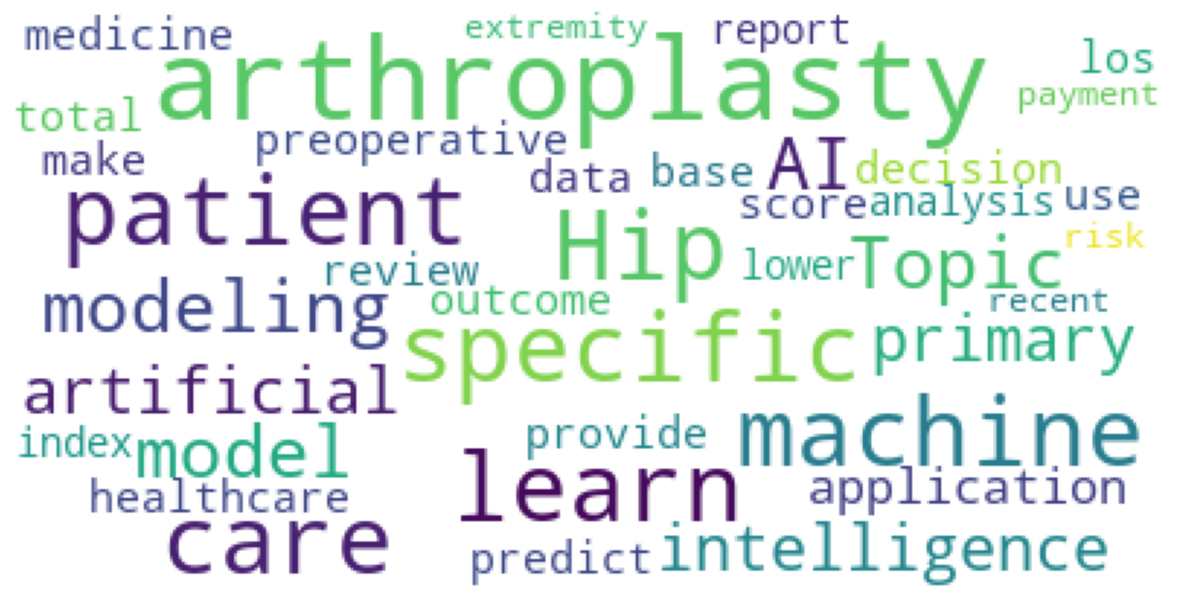

In [29]:
#from subprocess import check_output
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_topic_keywords.T[['Hip care modeling','AI in arthroplasty']]))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
save_fig('Hip care modeling&AI in arthroplasty', tight_layout=True, fig_extension="png", resolution=300)
plt.show()

2) Which are the most commonly used data mining techniques in sports medicine? 

Saving figure Injury data mining&Advanced imaging techniques


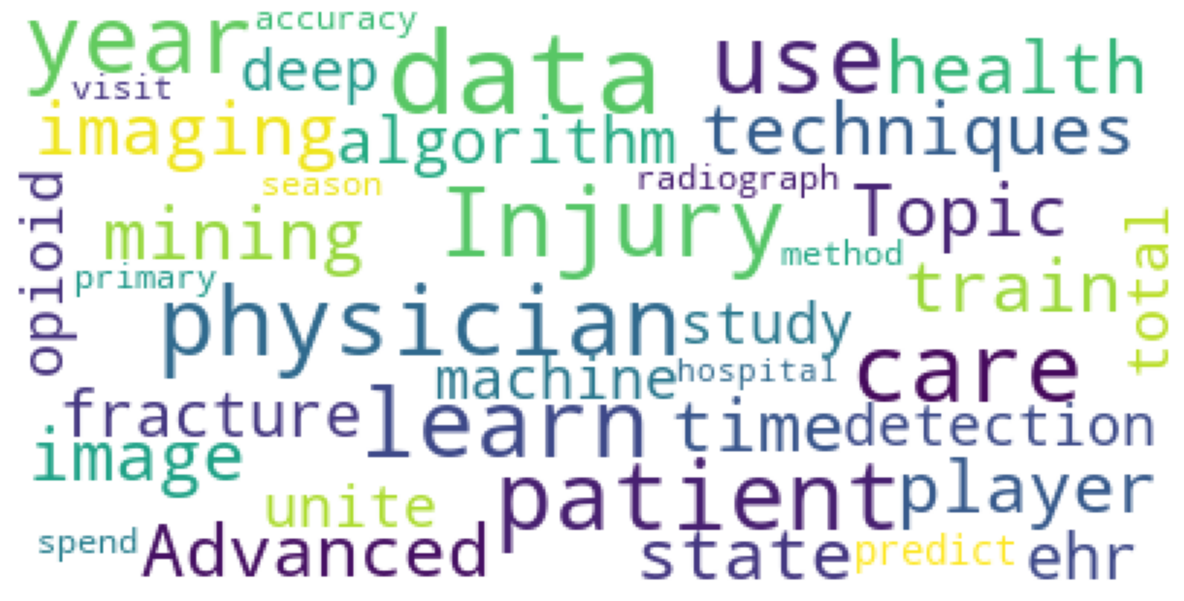

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_topic_keywords.T[['Injury data mining','Advanced imaging techniques']]))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
save_fig('Injury data mining&Advanced imaging techniques', tight_layout=True, fig_extension="png", resolution=300)

plt.show()